# Assignment 1-d: Deep Learning Hello World! (3-layer MLP+Dropout+Optimizer)

Objective: To be able to improve upon the 3-layer MLP + Dropout in part 3 by adding different optimization for MNIST Classification

Step 1: Taking care of the imports which includes numpy, datasets, models, layers, optimizers, and utils. <br />
You will also be able to tell if your set-up is correct/complete.

In [2]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils

from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
plt.rcParams['figure.figsize'] = [10, 6]

Step 2: Set-up some constants to be utilized in the training/testing of the model <br\>

In [3]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits, i.e. 0,1,2,3,4,5,6,7,8,9
OPTIMIZER = Adam()  
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN dataset is reserved for VALIDATION

DROPOUT = 0.3

np.random.seed(1983)  # for reproducibility

Step 3: Load the MNIST Dataset which are shuffled and split between train and test sets <br\>
- X_train is 60000 rows of 28x28 values
- X_test is 10000 rows of 28x28 values

First 100 train images:


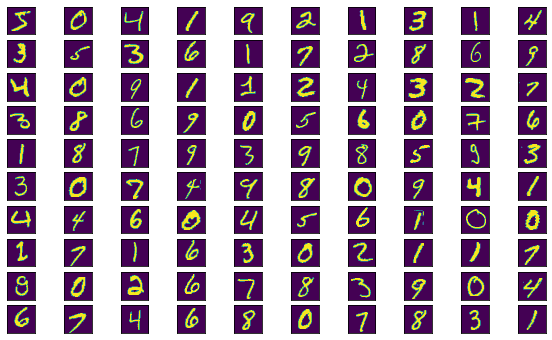

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("First 100 train images:")
for k in range(100):
    plt.subplot(10, 10, k+1)      
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.imshow(X_train[k])

Step 4: Preprocess the input data by reshaping it, converting it to float, and normalizing it [0-1].

In [7]:
# reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


Step 5: Convert class vectors to binary class matrices; One-Hot-Encoding (OHE)

In [8]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

Step 6: Create the model with 3 layers: Input:784 ==> Hidden:128 w/ dropout ==> Hidden:128 w/ dropout ==> Output:10 (with Softmax activation)

In [9]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Step 7: Compile the model with categorical_crossentropy loss function, Adam optimizer, and accuracy metric

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

Step 8: Perform the training with 128 batch size, 250 epochs, and 20 % of the train data used for validation

In [11]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 69us/step - loss: 0.5110 - accuracy: 0.8453 - val_loss: 0.1823 - val_accuracy: 0.9451
Epoch 2/20
48000/48000 [==============================] - 3s 54us/step - loss: 0.2332 - accuracy: 0.9301 - val_loss: 0.1364 - val_accuracy: 0.9598
Epoch 3/20
48000/48000 [==============================] - 2s 52us/step - loss: 0.1796 - accuracy: 0.9463 - val_loss: 0.1197 - val_accuracy: 0.9657
Epoch 4/20
48000/48000 [==============================] - 3s 53us/step - loss: 0.1507 - accuracy: 0.9548 - val_loss: 0.1042 - val_accuracy: 0.9700
Epoch 5/20
48000/48000 [==============================] - 3s 54us/step - loss: 0.1293 - accuracy: 0.9610 - val_loss: 0.0966 - val_accuracy: 0.9713
Epoch 6/20
48000/48000 [==============================] - 3s 53us/step - loss: 0.1150 - accuracy: 0.9650 - val_loss: 0.0964 - val_accuracy: 0.9712
Epoch 7/20
48000/48000 [==============================] - 3s 54us/st

Step 9: Evaluate the model on the test dataset (10,000 images)

In [12]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 44us/step

Test score: 0.07647445303800632
Test accuracy: 0.978600025177002


Step 10: Plot the accuracy from history

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


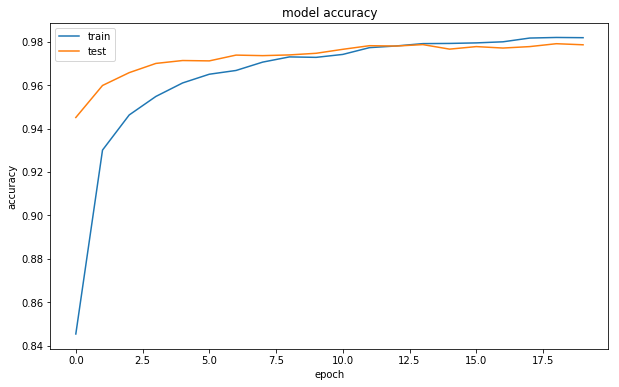

In [14]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Step 11: Plot the loss from history

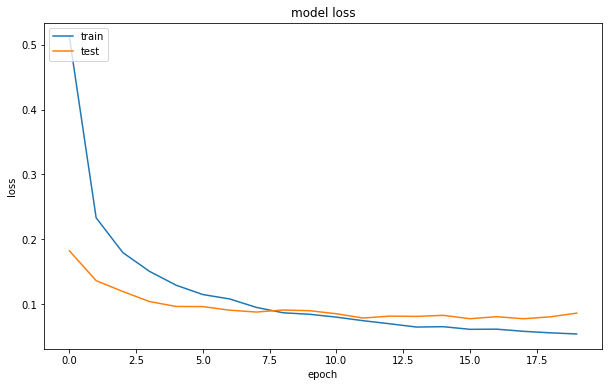

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[Optional] Step 12: Save the model (serialized) to JSON

In [16]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
%ls

DeepLearningHelloWorldPart4.ipynb        mnist_mlp.py       README.md
DeepLearningHelloWorldPart5.ipynb        mnist_mlp_run.txt  Untitled.ipynb
KerasTutorialDeepLearninginPython.ipynb  model.json


[Optional] Step 13: Save the model weights

In [17]:
model.save_weights("model.h5")
%ls

DeepLearningHelloWorldPart4.ipynb        mnist_mlp.py       model.json
DeepLearningHelloWorldPart5.ipynb        mnist_mlp_run.txt  README.md
KerasTutorialDeepLearninginPython.ipynb  model.h5           Untitled.ipynb


[Optional] Step 14: Load the saved model

In [18]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

[Optional] Step 15: Compile and evaluate loaded model

In [19]:
loaded_model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 41us/step

Test score: 0.07647445303800632
Test accuracy: 0.978600025177002
